In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn import metrics
from sklearn. cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as hcluster
import matplotlib.pyplot as plt



In [2]:
titanic_data_path='Titanic.csv'

In [3]:
df= pd.read_csv(titanic_data_path)

In [4]:
df.describe()

,sex,sibsp,parch,class,who
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.352413,0.372615,0.244669,2.308642,1.789001
std,0.477990,0.821270,0.467677,0.836071,0.594291
min,2.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,0.000000,0.000000,2.000000,1.000000
50%,2.000000,0.000000,0.000000,3.000000,2.000000
75%,3.000000,1.000000,0.000000,3.000000,2.000000
max,3.000000,8.000000,6.000000,3.000000,3.000000


<Axes: >

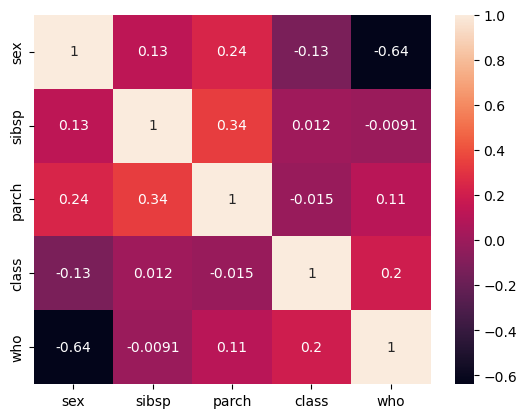

In [5]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot =True)

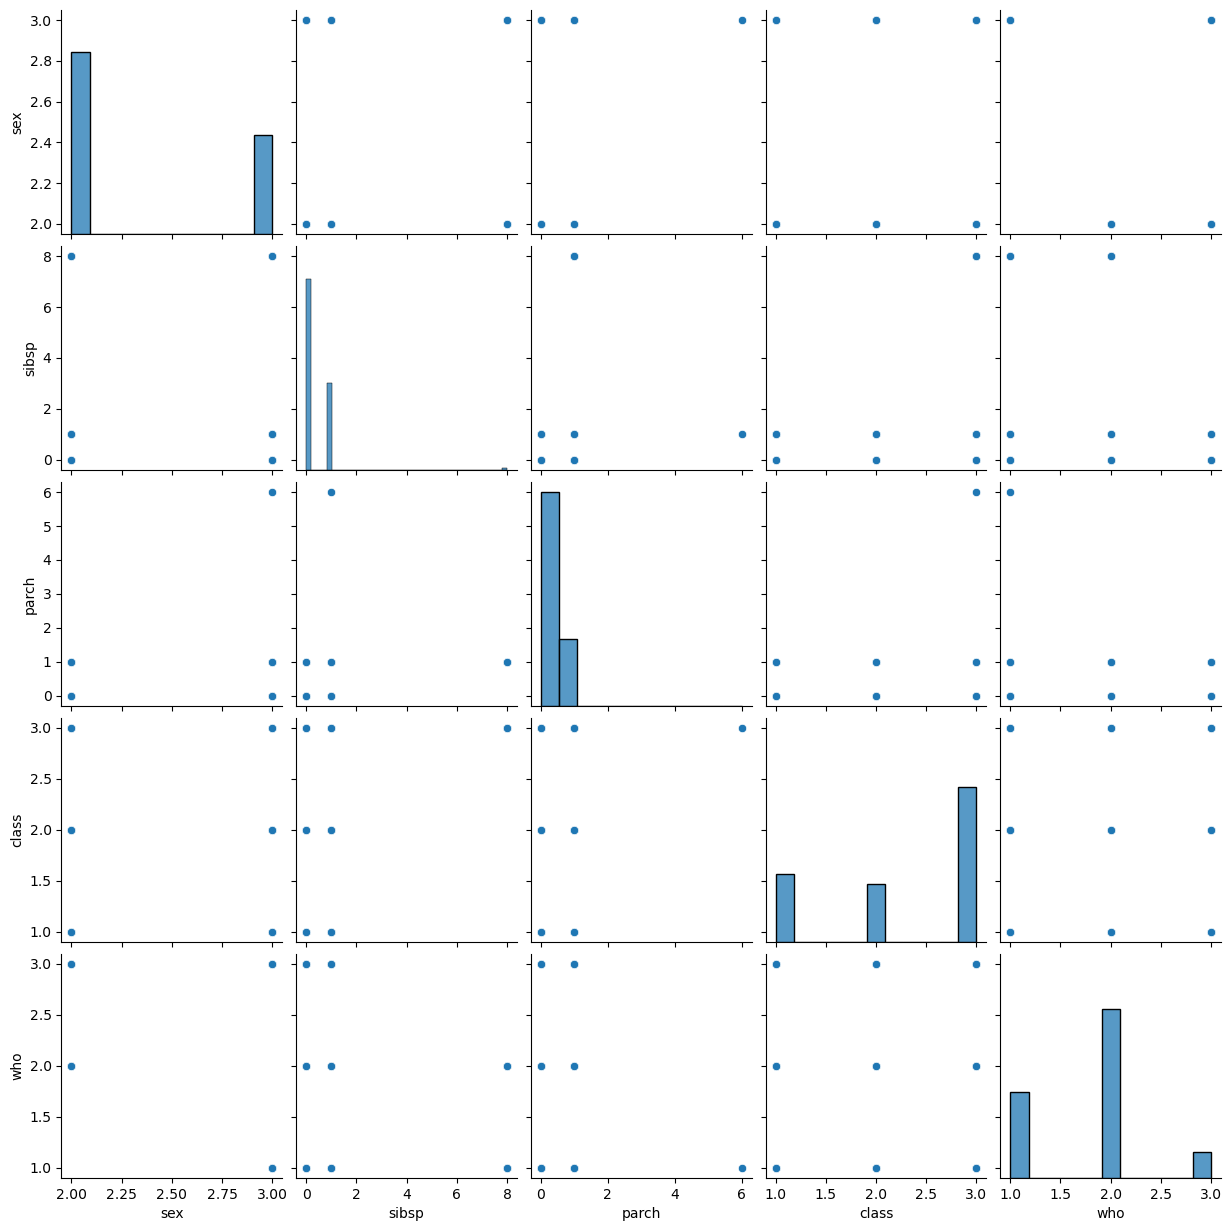

In [6]:
sns.pairplot(df)

In [7]:
scaling= StandardScaler()


In [8]:
scaled =scaling.fit_transform(df)

In [9]:
scaled_df=pd.DataFrame(scaled,columns =df.columns)

In [10]:
scaled_df.head()

,sex,sibsp,parch,class,who
0,-0.737695,0.764349,-0.523452,0.827377,0.355242
1,1.355574,0.764349,-0.523452,-1.566107,-1.328379
2,1.355574,-0.453960,-0.523452,0.827377,-1.328379
3,1.355574,0.764349,-0.523452,-1.566107,-1.328379
4,-0.737695,-0.453960,-0.523452,0.827377,0.355242


<Axes: >

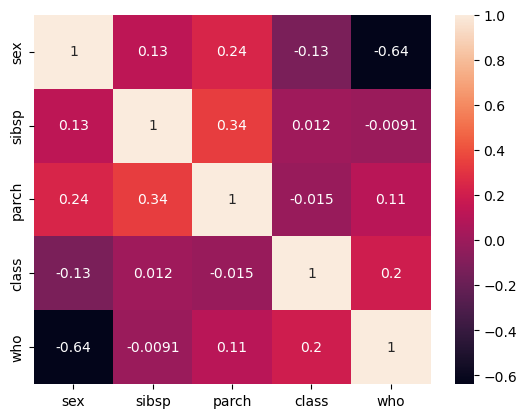

In [11]:
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot =True)

In [12]:
df.describe()

,sex,sibsp,parch,class,who
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.352413,0.372615,0.244669,2.308642,1.789001
std,0.477990,0.821270,0.467677,0.836071,0.594291
min,2.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,0.000000,0.000000,2.000000,1.000000
50%,2.000000,0.000000,0.000000,3.000000,2.000000
75%,3.000000,1.000000,0.000000,3.000000,2.000000
max,3.000000,8.000000,6.000000,3.000000,3.000000


/home/user/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/user/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/user/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/user/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'au

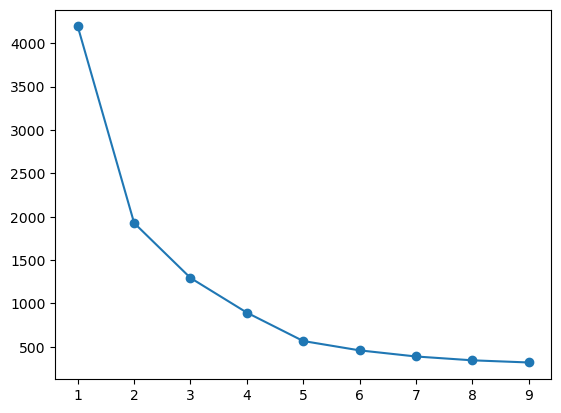

In [25]:
a=[]
K =range(1,10)
for i in K:
    kmean =KMeans(n_clusters=i)
    kmean.fit(df)
    a.append(kmean.inertia_)
    
plt.plot(K,a,marker='o')



In [14]:
kmeans = KMeans(n_clusters=5, random_state=42) 


In [28]:
kmeans.fit(scaled_df)

/home/user/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=42)

In [16]:
pd.Series(kmeans.labels_).value_counts()

0    394
1    212
4    176
3    102
2      7
dtype: int64

In [18]:
metrics.silhouette_score(scaled_df,kmeans.labels_)

0.4914319945305484

In [19]:
preds =kmeans.labels_
kmeans_df =pd.DataFrame(df)
kmeans_df['KMeans_Clusters'] =preds
kmeans_df.head(10)

,sex,sibsp,parch,class,who,KMeans_Clusters
0,2,1,0,3,2,0
1,3,1,0,1,1,1
2,3,0,0,3,1,4
3,3,1,0,1,1,1
4,2,0,0,3,2,0
5,2,0,0,3,2,0
6,2,0,0,1,2,1
7,2,1,1,3,3,3
8,3,0,1,3,1,4
9,3,1,0,2,3,3


In [20]:
kmeans_df.to_csv('kmeans_result.csv',index =False)

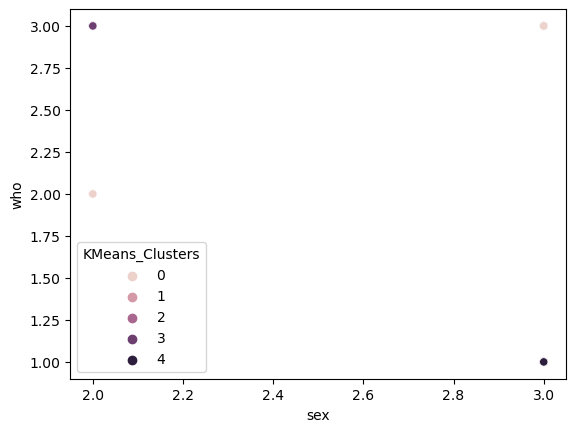

In [26]:
sns.scatterplot(x=kmeans_df['sex'], y=kmeans_df['who'], hue=kmeans_df['KMeans_Clusters'])
plt.show()

In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.
